# Importing Required libraries

In [2]:
import pandas as pd 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
import os
os.listdir("/kaggle/input/")

['market-basket-analysis']

# Improveing the quality of dataset

In [4]:
#df = pd.read_csv("/kaggle/input/market-basket-analysis/Assignment-1_Data.csv",on_bad_lines='warn', quoting=1)
# Step 1: Read and clean the raw file
with open("/kaggle/input/market-basket-analysis/Assignment-1_Data.csv", encoding='utf-8') as f:
    content = f.read()

# Step 2: Replace tab with dot in price fields
cleaned_content = content.replace('\t', '.')

# Step 3: Save cleaned file temporarily
with open("/kaggle/working/cleaned_data.csv", "w", encoding='utf-8') as f:
    f.write(cleaned_content)

# Step 4: Load cleaned CSV with correct separator
df = pd.read_csv("/kaggle/working/cleaned_data.csv", sep=';')

# Optional: Check if it's clean
print(df.head())


   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  


/tmp/ipykernel_31/2493912174.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/working/cleaned_data.csv", sep=';')


# Changing the dtypes t

In [5]:
# Convert Price to string, replace commas with dots, then convert to float
df['Price'] = df['Price'].astype(str).str.replace(',', '.').astype(float)
print(df['Price'])

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
522059    0.85
522060    2.10
522061    4.15
522062    4.15
522063    4.95
Name: Price, Length: 522064, dtype: float64


In [6]:
df['BillNo'] = df['BillNo'].astype(str)
print(df['BillNo'])

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522064, dtype: object


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M')
print(df['Date'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
522059   2011-12-09 12:50:00
522060   2011-12-09 12:50:00
522061   2011-12-09 12:50:00
522062   2011-12-09 12:50:00
522063   2011-12-09 12:50:00
Name: Date, Length: 522064, dtype: datetime64[ns]


# **Prepare Transactions in Basket Format**

In [8]:
# Grouping by Invoice and Itemname
basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

# Convert quantities to 1s and 0s
basket = basket.map(lambda x: 1 if x > 0 else 0)

print(basket.head())


Itemname  *Boombox Ipod Classic  *USB Office Mirror Ball  \
BillNo                                                     
536365                        0                        0   
536366                        0                        0   
536367                        0                        0   
536368                        0                        0   
536369                        0                        0   

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536365                         0                           0   
536366                         0                           0   
536367                         0                           0   
536368                         0                           0   
536369                         0                           0   

Itemname  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
BillNo                                                          

# ****Apply FP-Growth or Apriori from mlxtend****

In [9]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Generate frequent itemsets using FP-Growth
frequent_itemsets = fpgrowth(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                           antecedents  \
135                   (PINK REGENCY TEACUP AND SAUCER)   
134  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...   
136                  (GREEN REGENCY TEACUP AND SAUCER)   
133  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
129                  (GREEN REGENCY TEACUP AND SAUCER)   
128                   (PINK REGENCY TEACUP AND SAUCER)   
137                  (ROSES REGENCY TEACUP AND SAUCER)   
132  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
163                (GARDENERS KNEELING PAD CUP OF TEA)   
162                 (GARDENERS KNEELING PAD KEEP CALM)   

                                           consequents   support  confidence  \
135  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...  0.025485    0.699728   
134                   (PINK REGENCY TEACUP AND SAUCER)  0.025485    0.704514   
136  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.025485    0.528205   
133                  (GREEN REGENCY TEACU

Vizulizing the rule

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


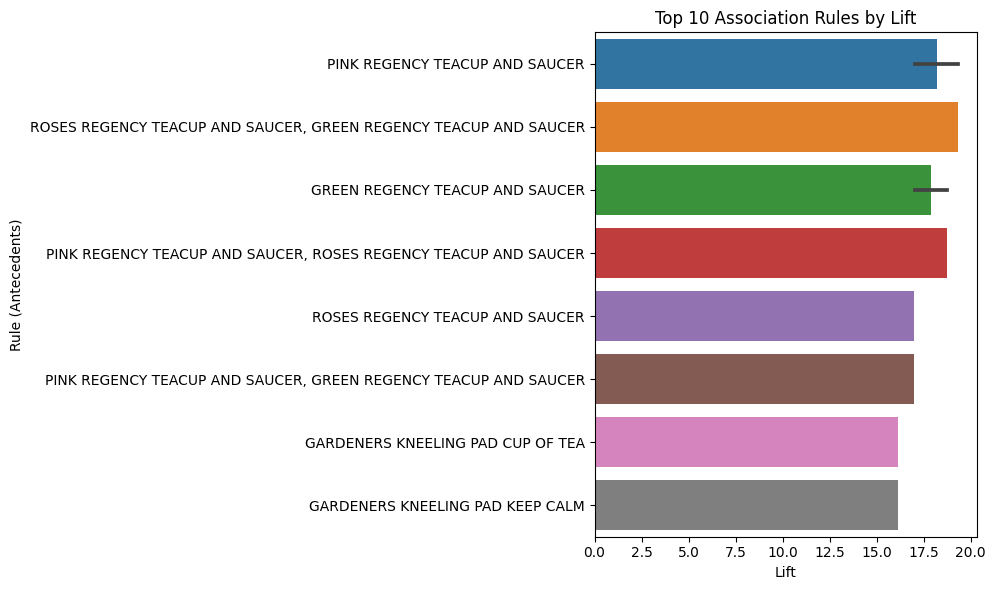

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))), data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule (Antecedents)')
plt.tight_layout()
plt.show()


**Fillttering specific rules**

In [11]:
strong_rules = rules[(rules['confidence'] >= 0.6) & (rules['lift'] >= 2)]
strong_rules = strong_rules.sort_values(by='lift', ascending=False)
strong_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
135,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036421,0.036174,0.025485,0.699728,19.343514,1.0,0.024167,3.209847,0.984147,0.540966,0.688459,0.702121
134,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036174,0.036421,0.025485,0.704514,19.343514,1.0,0.024167,3.261000,0.983894,0.540966,0.693346,0.702121
133,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028207,0.048248,0.025485,0.903509,18.726262,1.0,0.024124,9.863609,0.974074,0.500000,0.898617,0.715857
129,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048248,0.036421,0.029939,0.620513,17.037124,1.0,0.028181,2.539160,0.989023,0.547016,0.606169,0.721262
128,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036421,0.048248,0.029939,0.822011,17.037124,1.0,0.028181,5.347247,0.976884,0.547016,0.812988,0.721262


***Visulizing the items relitionship***

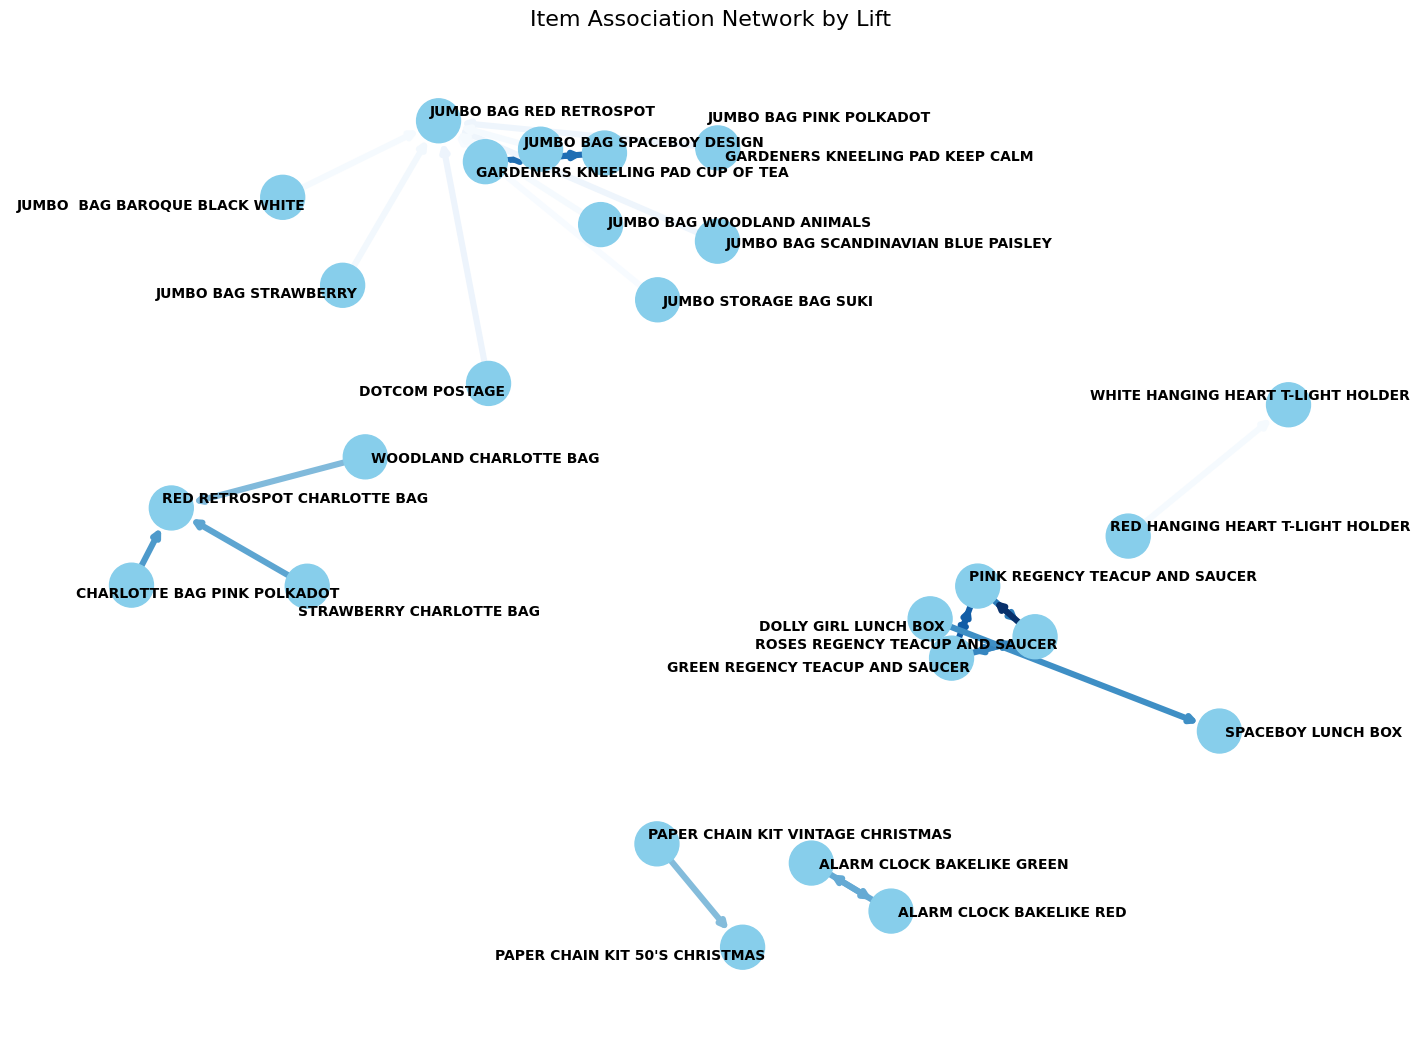

In [12]:

# Vectorized approach: Create a list of edges and weights
edges = [
    (antecedent, consequent, row['lift'])
    for _, row in strong_rules.iterrows()
    for antecedent in row['antecedents']
    for consequent in row['consequents']
]

# Create directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_weighted_edges_from(edges)

# Plotting the network graph
plt.figure(figsize=(14, 10))  # Increased figure size for better space
pos = nx.spring_layout(G, k=1, seed=42)  # Adjusted layout for better node spacing

# Define edge weights and node sizes
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
node_sizes = [1000 for _ in G.nodes()]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='skyblue', font_size=10,
        edge_color=edge_weights, edge_cmap=plt.cm.Blues, width=4.4)

# Extract labels and their positions
labels = {node: node for node in G.nodes()}
label_positions = {node: pos[node] for node in G.nodes()}

# Add labels to the graph with adjusted positions to avoid overlaps
texts = [plt.text(label_positions[node][0], label_positions[node][1], labels[node],
                  fontsize=10, ha='center', va='center', fontweight='bold') for node in G.nodes()]

# Adjust label positions using adjustText
adjust_text(texts, force_text=0.2, only_move={'points': 'y', 'text': 'y'}, expand_text=(1.05, 1.1))

# Set title
plt.title('Item Association Network by Lift', fontsize=16)
plt.show()


***Buliding simple recommander**

In [13]:
def recommend_items(item, rules_df):
    item = item.upper()
    recommendations = []

    for _, row in rules_df.iterrows():
        if item in row['antecedents']:
            recommendations.extend(list(row['consequents']))

    return set(recommendations)

# Example:
recommend_items("PINK REGENCY TEACUP AND SAUCER", strong_rules)


{'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER'}